In [1]:
%pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375569 sha256=e79720d28202a0a59f6f84b019debfd189d02bf61179a06f307357c85ab58d6d
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o


In [2]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [3]:
# Start the H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpanjfh9m7
  JVM stdout: /tmp/tmpanjfh9m7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpanjfh9m7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_nn5pp2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
diabetes = load_diabetes()

# Créer le DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Ajouter la colonne cible
diabetes_df['target'] = diabetes.target

In [5]:
diabetes_df.shape

(442, 11)

In [6]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [8]:
# Looking for missing values
diabetes_df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [9]:
# Convert the pandas DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(diabetes_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
x = h2o_df.columns[:-1]
y = 'target'

## Default H2OAutoML
Using the H2OAutoML tool with no specified parameter

In [11]:
aml1 = H2OAutoML(seed=1234)

In [12]:
aml1.train(x=x, y=y, training_frame=h2o_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240826_111816_model_1


Status of Neuron Layers: predicting target, regression, gaussian distribution, Quadratic loss, 1,201 weights/biases, 18.9 KB, 1,193,400 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms          mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  ------------------  -------------------  -----------------------
    1        10       Input             15.0
    2        100      RectifierDropout  50.0       0.0   0.0   0.0020624416091741295  0.0024635735899209976  0.0         -0.0023342301705051795  0.1562252640724182  0.01253804253360699  0.22979474067687988
    3        1        Linear                       0.0   0.0   0.0006736893445486203  0.0005135333631187677  0.0         0.03253899721428752     0.2287384271621704  0.09713213824762484  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 2283.782018307842
RMSE: 47.78893196450243
MAE: 37.687998400896326
RMSLE: 0.3713613386291037
Mean Residual Deviance: 2283.782018307842

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 2839.3438252695746
RMSE: 53.2854935725435
MAE: 42.623091574851756
RMSLE: 0.4046675765927451
Mean Residual Deviance: 2839.3438252695746

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     42.6287   4.24854    42.9531       39.8152       48.2959       37.3646       44.7148
mean_residual_deviance  2840.42   540.056    2656.73       2548.87       3649.9        2262.94       3083.66
mse                     2840.42   540.056    2656.73       2548.87       3649.9        2262.94       3083.66
r2                      0.516564  0.0525191  0.539693      0.580536      0.447488      0.534678      0.480426
residual_deviance       2840.42   540.056    2656.73       2548.87       3649.9        2262.94       3083.66
rmse                    53.1091   4.98092    51.5434       50.4863       60.4144       47.5704       55.5307
rmsle                   0.403534  0.0333266  0.397175      0.426497      0.435395      0.350272      0.408331

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples     training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ----------  ---------------  -------------------  --------------  -------------
    2024-08-26 11:21:46  0.000 sec                           0         0             0           nan              nan                  nan             nan
    2024-08-26 11:21:47  1 min 16.822 sec  18969 obs/sec     10        1             4420        53.7833          2892.64              43.4929         0.512192
    2024-08-26 11:21:52  1 min 21.865 sec  33529 obs/sec     400       40            176800      50.514           2551.67              40.2747         0.569694
    2024-08-26 11:21:57  1 min 26.869 sec  55502 obs/sec     1290      129           570180      48.9184          2393.01              38.7287         0.596449
    2024-08-26 11:22:02  1 min 31.905 sec  59784 obs/sec     2070      207           914940      48.2853          2331.47              38.039          0.606828
    2024-08-26 11:22

In [13]:
aml1.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20240826_111816_model_1,53.2855,2839.34,42.6231,0.404668,2839.34
StackedEnsemble_BestOfFamily_4_AutoML_1_20240826_111816,53.3488,2846.09,42.953,0.404379,2846.09
DeepLearning_grid_3_AutoML_1_20240826_111816_model_1,53.4194,2853.63,43.3243,0.405743,2853.63
DeepLearning_grid_2_AutoML_1_20240826_111816_model_1,53.4965,2861.88,42.9137,0.403424,2861.88
StackedEnsemble_BestOfFamily_6_AutoML_1_20240826_111816,53.5033,2862.61,43.1567,0.406893,2862.61
DeepLearning_grid_1_AutoML_1_20240826_111816_model_7,53.5583,2868.49,42.9183,0.40784,2868.49
DeepLearning_grid_1_AutoML_1_20240826_111816_model_12,53.563,2868.99,42.7248,0.406828,2868.99
DeepLearning_grid_1_AutoML_1_20240826_111816_model_13,53.5707,2869.82,43.1367,0.405931,2869.82
DeepLearning_grid_1_AutoML_1_20240826_111816_model_29,53.6829,2881.85,42.8066,0.407212,2881.85
DeepLearning_grid_1_AutoML_1_20240826_111816_model_14,53.6831,2881.88,43.2626,0.40851,2881.88


In [14]:
aml1.leader

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240826_111816_model_1


Status of Neuron Layers: predicting target, regression, gaussian distribution, Quadratic loss, 1,201 weights/biases, 18.9 KB, 1,193,400 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms          mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  ------------------  -------------------  -----------------------
    1        10       Input             15.0
    2        100      RectifierDropout  50.0       0.0   0.0   0.0020624416091741295  0.0024635735899209976  0.0         -0.0023342301705051795  0.1562252640724182  0.01253804253360699  0.22979474067687988
    3        1        Linear                       0.0   0.0   0.0006736893445486203  0.0005135333631187677  0.0         0.03253899721428752     0.2287384271621704  0.09713213824762484  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 2283.782018307842
RMSE: 47.78893196450243
MAE: 37.687998400896326
RMSLE: 0.3713613386291037
Mean Residual Deviance: 2283.782018307842

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 2839.3438252695746
RMSE: 53.2854935725435
MAE: 42.623091574851756
RMSLE: 0.4046675765927451
Mean Residual Deviance: 2839.3438252695746

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     42.6287   4.24854    42.9531       39.8152       48.2959       37.3646       44.7148
mean_residual_deviance  2840.42   540.056    2656.73       2548.87       3649.9        2262.94       3083.66
mse                     2840.42   540.056    2656.73       2548.87       3649.9        2262.94       3083.66
r2                      0.516564  0.0525191  0.539693      0.580536      0.447488      0.534678      0.480426
residual_deviance       2840.42   540.056    2656.73       2548.87       3649.9        2262.94       3083.66
rmse                    53.1091   4.98092    51.5434       50.4863       60.4144       47.5704       55.5307
rmsle                   0.403534  0.0333266  0.397175      0.426497      0.435395      0.350272      0.408331

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples     training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ----------  ---------------  -------------------  --------------  -------------
    2024-08-26 11:21:46  0.000 sec                           0         0             0           nan              nan                  nan             nan
    2024-08-26 11:21:47  1 min 16.822 sec  18969 obs/sec     10        1             4420        53.7833          2892.64              43.4929         0.512192
    2024-08-26 11:21:52  1 min 21.865 sec  33529 obs/sec     400       40            176800      50.514           2551.67              40.2747         0.569694
    2024-08-26 11:21:57  1 min 26.869 sec  55502 obs/sec     1290      129           570180      48.9184          2393.01              38.7287         0.596449
    2024-08-26 11:22:02  1 min 31.905 sec  59784 obs/sec     2070      207           914940      48.2853          2331.47              38.039          0.606828
    2024-08-26 11:22

In [15]:
aml1.leader.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_1_AutoML_1_20240826_111816_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_1_AutoML_1_20240826_111816_model_1'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240826_111816_training_Key_Frame__upload_88fa6f4814fd51c9c1396f96f26343df.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240826_111816_training_Key_Frame__upload_88fa6f4814fd51c9c1396f96f26343df.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240826_111816_training_Key_Frame__upload_88fa6f4814fd51c9c1396f96f26343df.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240826_11

## H2OAutoML with 10 max models
Using the H2OAutoML with the parameter : max_models=10

In [16]:
aml2 = H2OAutoML(
    max_models=10,
    seed=1234,
)

In [17]:
aml2.train(x=x, y=y, training_frame=h2o_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20240826_121604


GLM Model: summary
    family    link      regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.004511 )  nlambda = 30, lambda.max = 4510.9, lambda.min = 0.004511, lambda.1se = 0.5287  10                            10                             30                      AutoML_2_20240826_121604_training_Key_Frame__upload_88fa6f4814fd51c9c1396f96f26343df.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2862.4023812257706
RMSE: 53.50142410465137
MAE: 43.29852380304212
RMSLE: 0.4131868323964547
Mean Residual Deviance: 2862.4023812257706
R^2: 0.5172920839125978
Null degrees of freedom: 441
Residual degrees of freedom: 431
Null deviance: 2621009.1244343882
Residual deviance: 1265181.8525017905
AIC: 4796.403776089307

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 2957.240520633521
RMSE: 54.38051600190569
MAE: 44.00748695020531
RMSLE: 0.41892011523494954
Mean Residual Deviance: 2957.240520633521
R^2: 0.5012988326005592
Null degrees of freedom: 441
Residual degrees of freedom: 431
Null deviance: 2640763.135940601
Residual deviance: 1307100.3101200163
AIC: 4810.810903684591

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     980.005   14.2431    981.712       977.106       996.51        958.023       986.676
loglikelihood           0         0          0             0             0             0             0
mae                     44.0479   3.97773    43.0597       40.7867       49.5282       40.201        46.6641
mean_residual_deviance  2950.61   532.991    2759.85       2620.65       3689.97       2382.76       3299.83
mse                     2950.61   532.991    2759.85       2620.65       3689.97       2382.76       3299.83
null_deviance           528153    64555.7    519402        572860        597024        429065        522412
r2                      0.497203  0.0543786  0.521826      0.568724      0.441423      0.510041      0.444002
residual_deviance       260730    46269.6    245626        233238        324717        209683        290385
rmse                    54.1459   4.8524     52.5342       51.1923       60.7451       48.8136       57.4442
rmsle                   0.415639  0.0297922  0.39621       0.44438       0.442042      0.375288      0.420273

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se         alpha    iterations    training_rmse      training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  ------------------  -------  ------------  -----------------  -------------------  -----------------  ------------------
     2024-08-26 12:16:08  0.000 sec   1            .45E4     11            5926.061381865495   5970.787502816109   323.67644157382597  0.0
     2024-08-26 12:16:08  0.003 sec   2            .28E4     11            5923.733191097947   5968.926660986435   323.5821716225744   0.0
     2024-08-26 12:16:08  0.004 sec   3            .17E4     11            5919.989552587874   5965.933626732985   323.4

In [18]:
aml2.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GLM_1_AutoML_2_20240826_121604,54.3805,2957.24,44.0075,0.41892,2957.24
StackedEnsemble_BestOfFamily_1_AutoML_2_20240826_121604,54.3995,2959.3,44.0797,0.413673,2959.3
StackedEnsemble_AllModels_1_AutoML_2_20240826_121604,54.6865,2990.61,44.3152,0.414566,2990.61
GBM_2_AutoML_2_20240826_121604,56.7662,3222.4,46.1532,0.422742,3222.4
GBM_4_AutoML_2_20240826_121604,56.878,3235.11,46.6471,0.426902,3235.11
DRF_1_AutoML_2_20240826_121604,57.2042,3272.32,46.5602,0.431702,3272.32
XRT_1_AutoML_2_20240826_121604,57.2372,3276.1,46.5977,0.43071,3276.1
GBM_1_AutoML_2_20240826_121604,57.2477,3277.3,47.279,0.431522,3277.3
GBM_3_AutoML_2_20240826_121604,57.8101,3342.01,46.7408,0.432223,3342.01
XGBoost_1_AutoML_2_20240826_121604,62.8208,3946.46,48.414,0.476114,3946.46


In [19]:
aml2.leader

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20240826_121604


GLM Model: summary
    family    link      regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.004511 )  nlambda = 30, lambda.max = 4510.9, lambda.min = 0.004511, lambda.1se = 0.5287  10                            10                             30                      AutoML_2_20240826_121604_training_Key_Frame__upload_88fa6f4814fd51c9c1396f96f26343df.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2862.4023812257706
RMSE: 53.50142410465137
MAE: 43.29852380304212
RMSLE: 0.4131868323964547
Mean Residual Deviance: 2862.4023812257706
R^2: 0.5172920839125978
Null degrees of freedom: 441
Residual degrees of freedom: 431
Null deviance: 2621009.1244343882
Residual deviance: 1265181.8525017905
AIC: 4796.403776089307

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 2957.240520633521
RMSE: 54.38051600190569
MAE: 44.00748695020531
RMSLE: 0.41892011523494954
Mean Residual Deviance: 2957.240520633521
R^2: 0.5012988326005592
Null degrees of freedom: 441
Residual degrees of freedom: 431
Null deviance: 2640763.135940601
Residual deviance: 1307100.3101200163
AIC: 4810.810903684591

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     980.005   14.2431    981.712       977.106       996.51        958.023       986.676
loglikelihood           0         0          0             0             0             0             0
mae                     44.0479   3.97773    43.0597       40.7867       49.5282       40.201        46.6641
mean_residual_deviance  2950.61   532.991    2759.85       2620.65       3689.97       2382.76       3299.83
mse                     2950.61   532.991    2759.85       2620.65       3689.97       2382.76       3299.83
null_deviance           528153    64555.7    519402        572860        597024        429065        522412
r2                      0.497203  0.0543786  0.521826      0.568724      0.441423      0.510041      0.444002
residual_deviance       260730    46269.6    245626        233238        324717        209683        290385
rmse                    54.1459   4.8524     52.5342       51.1923       60.7451       48.8136       57.4442
rmsle                   0.415639  0.0297922  0.39621       0.44438       0.442042      0.375288      0.420273

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se         alpha    iterations    training_rmse      training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  ------------------  -------  ------------  -----------------  -------------------  -----------------  ------------------
     2024-08-26 12:16:08  0.000 sec   1            .45E4     11            5926.061381865495   5970.787502816109   323.67644157382597  0.0
     2024-08-26 12:16:08  0.003 sec   2            .28E4     11            5923.733191097947   5968.926660986435   323.5821716225744   0.0
     2024-08-26 12:16:08  0.004 sec   3            .17E4     11            5919.989552587874   5965.933626732985   323.4

## H2OAutoML with 20 max models
Using the H2OAutoML with the parameter : max_models=**20**

In [20]:
aml3 = H2OAutoML(
    max_models=20,
    seed=1234,
)

In [21]:
aml3.train(x=x, y=y, training_frame=h2o_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_3_20240826_121626_model_1


Status of Neuron Layers: predicting target, regression, gaussian distribution, Quadratic loss, 1,201 weights/biases, 18.9 KB, 1,356,940 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms          mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  ------------------  --------------------  -----------------------
    1        10       Input             15.0
    2        100      RectifierDropout  50.0       0.0   0.0   0.0020818171293576597  0.0023628389462828636  0.0         -0.0029364382996936913  0.1556113362312317  0.007690127716329815  0.23386740684509277
    3        1        Linear                       0.0   0.0   0.0007321432100434322  0.0004694380331784487  0.0         0.046684652231633664    0.2503000497817993  0.06182513565704455   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 2294.180877436921
RMSE: 47.89760826426431
MAE: 37.86117317977087
RMSLE: 0.3726703027485712
Mean Residual Deviance: 2294.180877436921

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 2843.5492555060687
RMSE: 53.32494027662918
MAE: 42.838528567371654
RMSLE: 0.4081764068104835
Mean Residual Deviance: 2843.5492555060687

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     42.8453   4.31899    43.0928       39.6251       48.2149       37.617        45.6765
mean_residual_deviance  2844.64   549.554    2676.17       2532.41       3645.16       2243.03       3126.43
mse                     2844.64   549.554    2676.17       2532.41       3645.16       2243.03       3126.43
r2                      0.515954  0.0544973  0.536325      0.583245      0.448206      0.538774      0.47322
residual_deviance       2844.64   549.554    2676.17       2532.41       3645.16       2243.03       3126.43
rmse                    53.141    5.08342    51.7317       50.323        60.3751       47.3606       55.9144
rmsle                   0.407224  0.0307304  0.401425      0.425682      0.433463      0.356486      0.419067

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2024-08-26 12:18:08  0.000 sec                           0         0             0            nan              nan                  nan             nan
    2024-08-26 12:18:08  1 min 21.183 sec  56666 obs/sec     10        1             4420         53.7961          2894.02              43.6826         0.511961
    2024-08-26 12:18:13  1 min 26.195 sec  50405 obs/sec     580       58            256360       50.0342          2503.42              39.7542         0.57783
    2024-08-26 12:18:18  1 min 31.200 sec  49515 obs/sec     1130      113           499460       49.0349          2404.43              38.7729         0.594524
    2024-08-26 12:18:23  1 min 36.201 sec  59777 obs/sec     2040      204           901680       48.5429          2356.41              38.2276         0.602621
    2024-08

In [22]:
aml3.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_3_20240826_121626_model_1,53.3249,2843.55,42.8385,0.408176,2843.55
StackedEnsemble_AllModels_1_AutoML_3_20240826_121626,53.4744,2859.52,43.0485,0.404995,2859.52
DeepLearning_grid_2_AutoML_3_20240826_121626_model_1,53.5414,2866.69,42.9436,0.40389,2866.69
DeepLearning_grid_3_AutoML_3_20240826_121626_model_1,53.5478,2867.37,43.2853,0.408901,2867.37
StackedEnsemble_BestOfFamily_1_AutoML_3_20240826_121626,53.8997,2905.18,43.5696,0.409585,2905.18
GLM_1_AutoML_3_20240826_121626,54.3805,2957.24,44.0075,0.41892,2957.24
DeepLearning_1_AutoML_3_20240826_121626,54.6236,2983.74,43.5822,0.413119,2983.74
GBM_grid_1_AutoML_3_20240826_121626_model_2,55.9307,3128.24,45.4978,0.421589,3128.24
GBM_2_AutoML_3_20240826_121626,56.7662,3222.4,46.1532,0.422742,3222.4
GBM_4_AutoML_3_20240826_121626,56.878,3235.11,46.6471,0.426902,3235.11


In [23]:
aml3.leader

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_3_20240826_121626_model_1


Status of Neuron Layers: predicting target, regression, gaussian distribution, Quadratic loss, 1,201 weights/biases, 18.9 KB, 1,356,940 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms          mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  ------------------  --------------------  -----------------------
    1        10       Input             15.0
    2        100      RectifierDropout  50.0       0.0   0.0   0.0020818171293576597  0.0023628389462828636  0.0         -0.0029364382996936913  0.1556113362312317  0.007690127716329815  0.23386740684509277
    3        1        Linear                       0.0   0.0   0.0007321432100434322  0.0004694380331784487  0.0         0.046684652231633664    0.2503000497817993  0.06182513565704455   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 2294.180877436921
RMSE: 47.89760826426431
MAE: 37.86117317977087
RMSLE: 0.3726703027485712
Mean Residual Deviance: 2294.180877436921

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 2843.5492555060687
RMSE: 53.32494027662918
MAE: 42.838528567371654
RMSLE: 0.4081764068104835
Mean Residual Deviance: 2843.5492555060687

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     42.8453   4.31899    43.0928       39.6251       48.2149       37.617        45.6765
mean_residual_deviance  2844.64   549.554    2676.17       2532.41       3645.16       2243.03       3126.43
mse                     2844.64   549.554    2676.17       2532.41       3645.16       2243.03       3126.43
r2                      0.515954  0.0544973  0.536325      0.583245      0.448206      0.538774      0.47322
residual_deviance       2844.64   549.554    2676.17       2532.41       3645.16       2243.03       3126.43
rmse                    53.141    5.08342    51.7317       50.323        60.3751       47.3606       55.9144
rmsle                   0.407224  0.0307304  0.401425      0.425682      0.433463      0.356486      0.419067

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2024-08-26 12:18:08  0.000 sec                           0         0             0            nan              nan                  nan             nan
    2024-08-26 12:18:08  1 min 21.183 sec  56666 obs/sec     10        1             4420         53.7961          2894.02              43.6826         0.511961
    2024-08-26 12:18:13  1 min 26.195 sec  50405 obs/sec     580       58            256360       50.0342          2503.42              39.7542         0.57783
    2024-08-26 12:18:18  1 min 31.200 sec  49515 obs/sec     1130      113           499460       49.0349          2404.43              38.7729         0.594524
    2024-08-26 12:18:23  1 min 36.201 sec  59777 obs/sec     2040      204           901680       48.5429          2356.41              38.2276         0.602621
    2024-08

## H2OAutoML with 10 max models and chosen algorithms
Using the H2OAutoML with the parameters : max_models=10 and include_algo=["GLM", "GBM", "XGBoost"]

In [24]:
include_algos = ["GLM", "GBM", "XGBoost"]
aml4 = H2OAutoML(
    max_models=10,
    seed=1234,
    include_algos=include_algos
)

In [25]:
aml4.train(x=x, y=y, training_frame=h2o_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_4_20240826_122223


GLM Model: summary
    family    link      regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.004511 )  nlambda = 30, lambda.max = 4510.9, lambda.min = 0.004511, lambda.1se = 0.5287  10                            10                             30                      AutoML_4_20240826_122223_training_Key_Frame__upload_88fa6f4814fd51c9c1396f96f26343df.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2862.4023812257706
RMSE: 53.50142410465137
MAE: 43.29852380304212
RMSLE: 0.4131868323964547
Mean Residual Deviance: 2862.4023812257706
R^2: 0.5172920839125978
Null degrees of freedom: 441
Residual degrees of freedom: 431
Null deviance: 2621009.1244343882
Residual deviance: 1265181.8525017905
AIC: 4796.403776089307

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 2957.240520633521
RMSE: 54.38051600190569
MAE: 44.00748695020531
RMSLE: 0.41892011523494954
Mean Residual Deviance: 2957.240520633521
R^2: 0.5012988326005592
Null degrees of freedom: 441
Residual degrees of freedom: 431
Null deviance: 2640763.135940601
Residual deviance: 1307100.3101200163
AIC: 4810.810903684591

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     980.005   14.2431    981.712       977.106       996.51        958.023       986.676
loglikelihood           0         0          0             0             0             0             0
mae                     44.0479   3.97773    43.0597       40.7867       49.5282       40.201        46.6641
mean_residual_deviance  2950.61   532.991    2759.85       2620.65       3689.97       2382.76       3299.83
mse                     2950.61   532.991    2759.85       2620.65       3689.97       2382.76       3299.83
null_deviance           528153    64555.7    519402        572860        597024        429065        522412
r2                      0.497203  0.0543786  0.521826      0.568724      0.441423      0.510041      0.444002
residual_deviance       260730    46269.6    245626        233238        324717        209683        290385
rmse                    54.1459   4.8524     52.5342       51.1923       60.7451       48.8136       57.4442
rmsle                   0.415639  0.0297922  0.39621       0.44438       0.442042      0.375288      0.420273

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se         alpha    iterations    training_rmse      training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  ------------------  -------  ------------  -----------------  -------------------  -----------------  ------------------
     2024-08-26 12:22:28  0.000 sec   1            .45E4     11            5926.061381865495   5970.787502816109   323.67644157382597  0.0
     2024-08-26 12:22:28  0.000 sec   2            .28E4     11            5923.733191097947   5968.926660986435   323.5821716225744   0.0
     2024-08-26 12:22:28  0.000 sec   3            .17E4     11            5919.989552587874   5965.933626732985   323.4

In [26]:
aml4.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GLM_1_AutoML_4_20240826_122223,54.3805,2957.24,44.0075,0.41892,2957.24
GBM_3_AutoML_4_20240826_122223,57.0086,3249.98,46.6105,0.428433,3249.98
GBM_2_AutoML_4_20240826_122223,57.0934,3259.66,46.059,0.429848,3259.66
GBM_1_AutoML_4_20240826_122223,57.2477,3277.3,47.279,0.431522,3277.3
GBM_4_AutoML_4_20240826_122223,57.646,3323.06,46.846,0.427839,3323.06
GBM_5_AutoML_4_20240826_122223,60.0727,3608.73,48.8905,0.446272,3608.73
XGBoost_3_AutoML_4_20240826_122223,61.1879,3743.96,48.3808,0.458794,3743.96
XGBoost_1_AutoML_4_20240826_122223,62.8208,3946.46,48.414,0.476114,3946.46
XGBoost_2_AutoML_4_20240826_122223,65.7564,4323.91,52.7459,0.494402,4323.91
XGBoost_grid_1_AutoML_4_20240826_122223_model_1,65.8053,4330.34,51.8577,0.490143,4330.34


In [27]:
aml4.leader

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_4_20240826_122223


GLM Model: summary
    family    link      regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.004511 )  nlambda = 30, lambda.max = 4510.9, lambda.min = 0.004511, lambda.1se = 0.5287  10                            10                             30                      AutoML_4_20240826_122223_training_Key_Frame__upload_88fa6f4814fd51c9c1396f96f26343df.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2862.4023812257706
RMSE: 53.50142410465137
MAE: 43.29852380304212
RMSLE: 0.4131868323964547
Mean Residual Deviance: 2862.4023812257706
R^2: 0.5172920839125978
Null degrees of freedom: 441
Residual degrees of freedom: 431
Null deviance: 2621009.1244343882
Residual deviance: 1265181.8525017905
AIC: 4796.403776089307

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 2957.240520633521
RMSE: 54.38051600190569
MAE: 44.00748695020531
RMSLE: 0.41892011523494954
Mean Residual Deviance: 2957.240520633521
R^2: 0.5012988326005592
Null degrees of freedom: 441
Residual degrees of freedom: 431
Null deviance: 2640763.135940601
Residual deviance: 1307100.3101200163
AIC: 4810.810903684591

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     980.005   14.2431    981.712       977.106       996.51        958.023       986.676
loglikelihood           0         0          0             0             0             0             0
mae                     44.0479   3.97773    43.0597       40.7867       49.5282       40.201        46.6641
mean_residual_deviance  2950.61   532.991    2759.85       2620.65       3689.97       2382.76       3299.83
mse                     2950.61   532.991    2759.85       2620.65       3689.97       2382.76       3299.83
null_deviance           528153    64555.7    519402        572860        597024        429065        522412
r2                      0.497203  0.0543786  0.521826      0.568724      0.441423      0.510041      0.444002
residual_deviance       260730    46269.6    245626        233238        324717        209683        290385
rmse                    54.1459   4.8524     52.5342       51.1923       60.7451       48.8136       57.4442
rmsle                   0.415639  0.0297922  0.39621       0.44438       0.442042      0.375288      0.420273

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se         alpha    iterations    training_rmse      training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  ------------------  -------  ------------  -----------------  -------------------  -----------------  ------------------
     2024-08-26 12:22:28  0.000 sec   1            .45E4     11            5926.061381865495   5970.787502816109   323.67644157382597  0.0
     2024-08-26 12:22:28  0.000 sec   2            .28E4     11            5923.733191097947   5968.926660986435   323.5821716225744   0.0
     2024-08-26 12:22:28  0.000 sec   3            .17E4     11            5919.989552587874   5965.933626732985   323.4

## Benchmarking Plots

In [28]:
import matplotlib.pyplot as plt

In [29]:
# Extracting leader metrics for each model
models = [aml1,aml2, aml3, aml4]
model_names = ["aml1", "aml2", "aml3", "aml4"]

metrics_data = []

for i, aml in enumerate(models):
    leader = aml.leader
    mae = leader.mae()
    rmse = leader.rmse()
    mse = leader.mse()

    metrics_data.append({
        "Model": model_names[i],
        "MAE": mae,
        "RMSE": rmse,
        "MSE": mse
    })

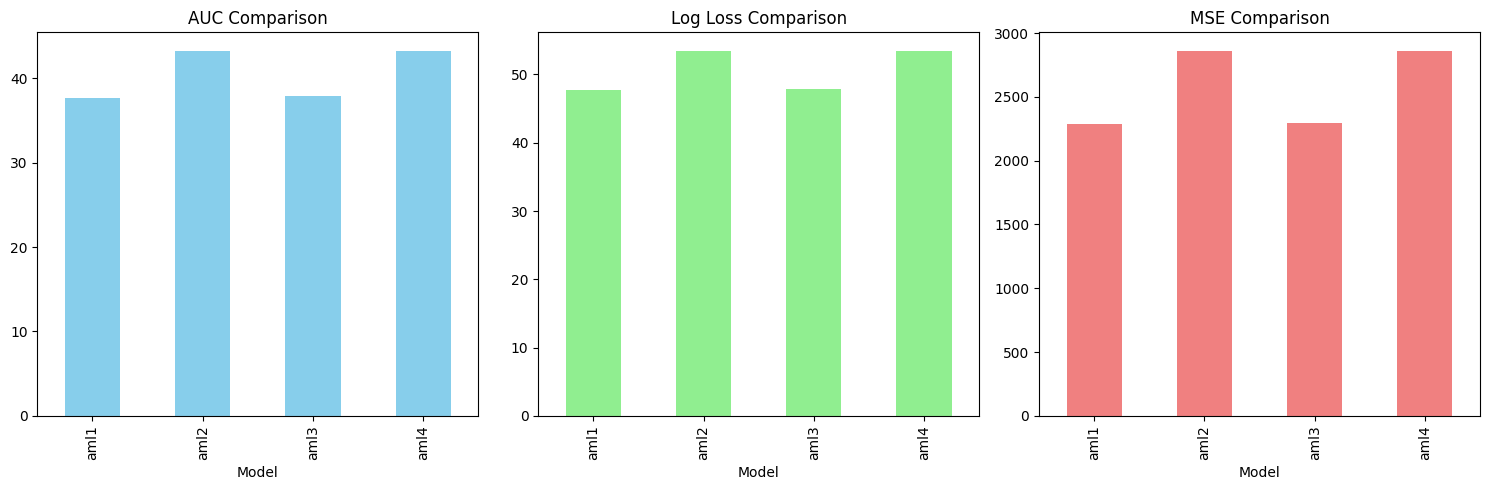

In [30]:
metrics_df = pd.DataFrame(metrics_data)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot MAE
metrics_df.plot(kind='bar', x='Model', y='MAE', ax=axes[0], color='skyblue', legend=False)
axes[0].set_title('AUC Comparison')

# Plot RMSE
metrics_df.plot(kind='bar', x='Model', y='RMSE', ax=axes[1], color='lightgreen', legend=False)
axes[1].set_title('Log Loss Comparison')

# Plot MSE
metrics_df.plot(kind='bar', x='Model', y='MSE', ax=axes[2], color='lightcoral', legend=False)
axes[2].set_title('MSE Comparison')

plt.tight_layout()
plt.show()